In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    roc_curve,  # Fungsi untuk mendapatkan data kurva ROC
    auc         # Fungsi untuk menghitung Area Under Curve
)

In [2]:
# Muat Dataset Fitur
try:
    df = pd.read_csv("yawn_features_final.csv")
    print("Dataset fitur berhasil dimuat.")
    print(df.head())
except FileNotFoundError:
    print("Error: File 'yawn_features_final.csv' tidak ditemukan. Pastikan file sudah dibuat dari script sebelumnya.")
    exit()

Dataset fitur berhasil dimuat.
   subject_id  mar_mean   mar_max   mar_std  label
0   no_yawn_1  0.053303  0.179509  0.058467      0
1  no_yawn_10  0.080693  0.214398  0.043297      0
2  no_yawn_11  0.027227  0.038065  0.007924      0
3  no_yawn_12  0.050905  0.068027  0.009067      0
4  no_yawn_13  0.016059  0.022436  0.004218      0


In [5]:
# --- Langkah 2: Persiapan Data ---

# Pisahkan antara fitur (X) dan label (y)
# Kita hapus kolom yang tidak diperlukan untuk training, seperti subject_id
X = df.drop(columns=['label', 'subject_id'])
y = df['label']


In [6]:
# Langkah 2.1: Pembagian pertama (80% train, 20% sementara untuk test+validation)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.2,  # 20% dari data akan dipisahkan
    random_state=42, 
    stratify=y
)

# Langkah 2.2: Pembagian kedua dari data sementara (20%) menjadi 10% validation dan 10% test
# Kita bagi data sementara (X_temp) menjadi dua bagian sama besar (50% dari 20% = 10% total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, # 50% dari X_temp akan menjadi test set
    random_state=42, 
    stratify=y_temp
)

print("\nDataset berhasil dibagi:")
print(f"  - Ukuran Train Set      : {len(X_train)} sampel ({len(X_train)/len(df):.0%})")
print(f"  - Ukuran Validation Set : {len(X_val)} sampel ({len(X_val)/len(df):.0%})")
print(f"  - Ukuran Test Set         : {len(X_test)} sampel ({len(X_test)/len(df):.0%})")


Dataset berhasil dibagi:
  - Ukuran Train Set      : 168 sampel (80%)
  - Ukuran Validation Set : 21 sampel (10%)
  - Ukuran Test Set         : 22 sampel (10%)


In [ ]:
# Lakukan penskalaan fitur. Ini penting untuk performa SVM.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Gunakan scaler yang sama dari data train

In [ ]:
# --- Langkah 3: Latih Model SVM ---

print("\nMelatih model Support Vector Machine (SVM)...")

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("Model SVM berhasil dilatih.")


Melatih model Support Vector Machine (SVM)...
Model SVM berhasil dilatih.


             LAPORAN PERFORMA MODEL SVM             

>> Akurasi Model pada Test Set: 100.00%

>> Skor AUC (Area Under Curve): 1.0000

>> Laporan Klasifikasi:
              precision    recall  f1-score   support

     no_yawn       1.00      1.00      1.00        10
        yawn       1.00      1.00      1.00        12

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

>> Confusion Matrix:
[[10  0]
 [ 0 12]]




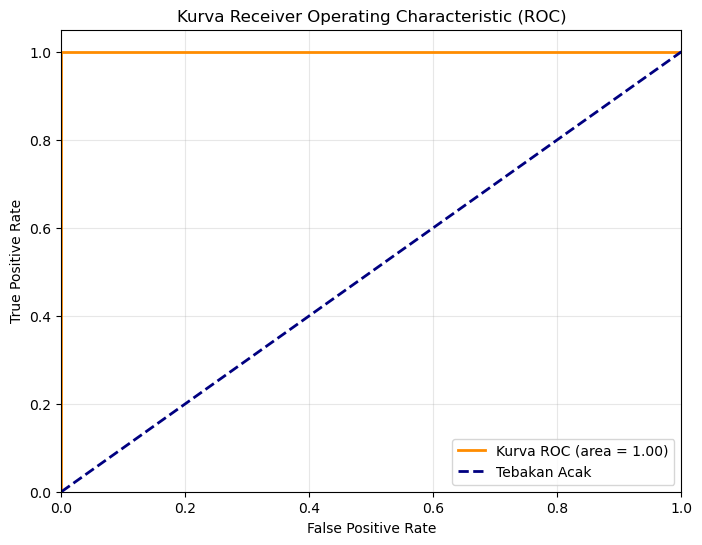

In [12]:
# --- Langkah 4: Buat Laporan Lengkap ---

# 4.1. Lakukan prediksi untuk laporan klasifikasi
y_pred_class = svm_model.predict(X_test_scaled)

# 4.2. Dapatkan PROBABILITAS prediksi untuk kurva ROC
# Kita ambil probabilitas untuk kelas positif (label '1' -> 'yawn')
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# 4.3. Hitung data untuk Kurva ROC
# Ini menghasilkan False Positive Rate (fpr), True Positive Rate (tpr), dan thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 4.4. Hitung skor AUC
roc_auc = auc(fpr, tpr)

# --- Cetak Laporan ---
print("======================================================")
print("             LAPORAN PERFORMA MODEL SVM             ")
print("======================================================")

# Akurasi
accuracy = accuracy_score(y_test, y_pred_class)
print(f"\n>> Akurasi Model pada Test Set: {accuracy * 100:.2f}%\n")

# Skor AUC
print(f">> Skor AUC (Area Under Curve): {roc_auc:.4f}\n")

# Laporan Klasifikasi
print(">> Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_class, target_names=['no_yawn', 'yawn']))

# Confusion Matrix
print(">> Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class)
print(cm)
print("\n======================================================\n")

# --- Plot Kurva ROC ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Kurva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Tebakan Acak')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Dataset fitur berhasil dimuat.
Membuat plot... Mohon tunggu sebentar.


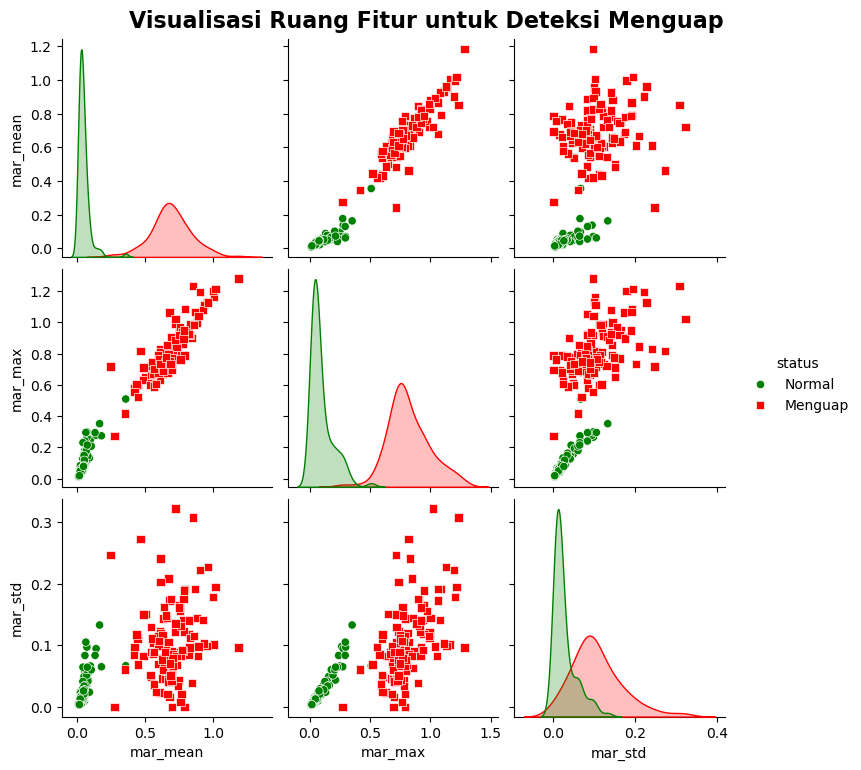


Plot selesai ditampilkan.


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Muat Dataset Fitur ---
try:
    df = pd.read_csv("yawn_features_final.csv")
    print("Dataset fitur berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'yawn_features_final.csv' tidak ditemukan. Jalankan script ekstraksi fitur terlebih dahulu.")
    exit()

# --- 2. Membuat Pair Plot dengan Seaborn ---
print("Membuat plot... Mohon tunggu sebentar.")

# Mengganti nilai label numerik dengan teks agar lebih mudah dibaca di legenda plot
df['status'] = df['label'].apply(lambda x: 'Menguap' if x == 1 else 'Normal')

# Tentukan kolom fitur yang ingin di-plot
feature_columns = ['mar_mean', 'mar_max', 'mar_std']

# Membuat pair plot
# hue='status' akan mewarnai titik data berdasarkan kelasnya
g = sns.pairplot(df, hue='status', vars=feature_columns, palette={'Normal': 'green', 'Menguap': 'red'}, markers=["o", "s"])

# Menambahkan judul utama
g.fig.suptitle("Visualisasi Ruang Fitur untuk Deteksi Menguap", y=1.02, fontsize=16, fontweight='bold')

# Tampilkan plot
plt.show()

print("\nPlot selesai ditampilkan.")